<a href="https://colab.research.google.com/github/HarishAchappaKallira/hakcds/blob/main/M2_MP4_NB_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## **Note:** This notebook is part of an in-house Kaggle competition

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1c7PrbKrURFcnEB61dSoS9cBnUUVhhj-l/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [ ]:
!pip -qq install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, metrics, cv
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

#additional libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, KFold
from xgboost import cv

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
df = pd.read_csv('hr_employee_attrition_train.csv')

In [ ]:
# Check the shape of dataframe.
df.shape

(1170, 35)

In [ ]:
# inspect the dataframe
df.dtypes

,0
age,int64
businesstravel,object
dailyrate,int64
department,object
distancefromhome,int64
education,int64
educationfield,object
employeecount,int64
employeenumber,int64
environmentsatisfaction,int64


In [ ]:
df.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,2,Female,93,2,2,Manufacturing Director,4,Married,5906,23888,0,Y,No,13,3,4,80,2,10,2,2,9,8,3,8,No
1,34,Travel_Rarely,970,Research & Development,8,2,Medical,1,757,2,Female,96,3,2,Healthcare Representative,3,Single,6142,7360,3,Y,No,11,3,4,80,0,10,2,3,5,1,4,3,No
2,39,Travel_Rarely,360,Research & Development,23,3,Medical,1,1310,3,Male,93,3,1,Research Scientist,1,Single,3904,22154,0,Y,No,13,3,1,80,0,6,2,3,5,2,0,3,Yes
3,26,Travel_Rarely,933,Sales,1,3,Life Sciences,1,476,3,Male,57,3,2,Sales Executive,3,Married,5296,20156,1,Y,No,17,3,2,80,1,8,3,3,8,7,7,7,No
4,40,Travel_Rarely,329,Research & Development,1,4,Life Sciences,1,1361,2,Male,88,3,1,Laboratory Technician,2,Married,2387,6762,3,Y,No,22,4,3,80,1,7,3,3,4,2,0,3,No


In [ ]:
# check for unique values across the data sets to analyze the features
for col in df.columns:
  print(col, df[col].nunique())

age 43
businesstravel 3
dailyrate 778
department 3
distancefromhome 29
education 5
educationfield 6
employeecount 1
employeenumber 1170
environmentsatisfaction 4
gender 2
hourlyrate 71
jobinvolvement 4
joblevel 5
jobrole 9
jobsatisfaction 4
maritalstatus 3
monthlyincome 1097
monthlyrate 1149
numcompaniesworked 10
over18 1
overtime 2
percentsalaryhike 15
performancerating 2
relationshipsatisfaction 4
standardhours 1
stockoptionlevel 4
totalworkingyears 40
trainingtimeslastyear 7
worklifebalance 4
yearsatcompany 37
yearsincurrentrole 19
yearssincelastpromotion 16
yearswithcurrmanager 18
attrition 2


In [ ]:
#check for missing values
df.isnull().sum()

,0
age,0
businesstravel,0
dailyrate,0
department,0
distancefromhome,0
education,0
educationfield,0
employeecount,0
employeenumber,0
environmentsatisfaction,0


In [ ]:
#Harish
#iterate over each column and print all unique values in each column except for daily rate. Why? Understand categorical, ordinal-categoric, numeric
for col in df.columns:
    if col != 'dailyrate': # has lot of unique values
        print(col, df[col].unique())

age [45 34 39 26 40 29 57 28 33 31 30 56 21 27 41 35 36 43 50 32 20 24 54 37
 44 38 51 42 58 59 18 52 46 47 23 19 22 25 53 49 48 55 60]
businesstravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
department ['Research & Development' 'Sales' 'Human Resources']
distancefromhome [25  8 23  1  2 22  9 18 20  6 19 12 13 15 16  4 26 27 11 10  7  3 24 28
 21 29  5 14 17]
education [2 3 4 5 1]
educationfield ['Life Sciences' 'Medical' 'Technical Degree' 'Other' 'Marketing'
 'Human Resources']
employeecount [1]
employeenumber [1888  757 1310 ... 1257 1801  214]
environmentsatisfaction [2 3 4 1]
gender ['Female' 'Male']
hourlyrate [ 93  96  57  88  71  72  90  50  69  63  81  65  84  83  42  77  67  40
  36  95  53  46  56  39  66  52  33  86  37  92  97  68  35  61  49  74
  98  31  89  76  85  73  47 100  62  54  78  99  79  87  94  48  51  82
  41  91  80  58  75  43  55  45  30  70  64  59  32  44  34  60  38]
jobinvolvement [2 3 1 4]
joblevel [2 1 3 4 5]
jobrole ['Manufacturing Direct

In [ ]:
# Organize columns for encoding
#ordinal-categorical
ordinal_categorical =  ['education', 'environmentsatisfaction', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'numcompaniesworked', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'worklifebalance']

#create new df_oc from df for ordinal categorical values
df_oc = df[ordinal_categorical]

#categorical columns --> Use label encoding as there is no order in data
categorical =  ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'overtime']
df_cat = df[categorical]

#numeric columns
numeric_col = ['age', 'distancefromhome', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'percentsalaryhike', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
df_numcols = df[numeric_col]


#store drop columns
drop_cols = ['employeecount', 'employeenumber', 'over18', 'standardhours']

In [ ]:
#Harish
#create new df for X
df_new = pd.concat([df_oc, df_cat, df_numcols], axis=1)

In [ ]:
#harish
df_new.head(5)

,education,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,numcompaniesworked,performancerating,relationshipsatisfaction,stockoptionlevel,worklifebalance,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime,age,distancefromhome,hourlyrate,monthlyincome,monthlyrate,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,2,2,2,2,4,0,3,4,2,2,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,No,45,25,93,5906,23888,13,10,2,9,8,3,8
1,2,2,3,2,3,3,3,4,0,3,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Single,No,34,8,96,6142,7360,11,10,2,5,1,4,3
2,3,3,3,1,1,0,3,1,0,3,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,No,39,23,93,3904,22154,13,6,2,5,2,0,3
3,3,3,3,2,3,1,3,2,1,3,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married,No,26,1,57,5296,20156,17,8,3,8,7,7,7
4,4,2,3,1,2,3,4,3,1,3,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,No,40,1,88,2387,6762,22,7,3,4,2,0,3


In [ ]:
#Harish
#construct X
X = pd.concat([df_cat, df_oc, df_numcols], axis=1)

In [ ]:
X.dtypes

,0
businesstravel,object
department,object
educationfield,object
gender,object
jobrole,object
maritalstatus,object
overtime,object
education,int64
environmentsatisfaction,int64
jobinvolvement,int64


In [ ]:
#le categorical columns
le_bt = LabelEncoder()
le_dept = LabelEncoder()
le_ed = LabelEncoder()
le_gender = LabelEncoder()
le_jobrole = LabelEncoder()
le_maritalstatus = LabelEncoder()
le_overtime = LabelEncoder()

X['businesstravel'] = le_bt.fit_transform(X['businesstravel'])
X['department'] = le_dept.fit_transform(X['department'])
X['educationfield'] = le_ed.fit_transform(X['educationfield'])
X['gender'] = le_gender.fit_transform(X['gender'])
X['jobrole'] = le_jobrole.fit_transform(X['jobrole'])
X['maritalstatus'] = le_maritalstatus.fit_transform(X['maritalstatus'])
X['overtime'] = le_overtime.fit_transform(X['overtime'])

In [ ]:
X.dtypes

,0
businesstravel,int64
department,int64
educationfield,int64
gender,int64
jobrole,int64
maritalstatus,int64
overtime,int64
education,int64
environmentsatisfaction,int64
jobinvolvement,int64


In [ ]:
X.head(5)

,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime,education,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,numcompaniesworked,performancerating,relationshipsatisfaction,stockoptionlevel,worklifebalance,age,distancefromhome,hourlyrate,monthlyincome,monthlyrate,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,2,1,1,0,4,1,0,2,2,2,2,4,0,3,4,2,2,45,25,93,5906,23888,13,10,2,9,8,3,8
1,2,1,3,0,0,2,0,2,2,3,2,3,3,3,4,0,3,34,8,96,6142,7360,11,10,2,5,1,4,3
2,2,1,3,1,6,2,0,3,3,3,1,1,0,3,1,0,3,39,23,93,3904,22154,13,6,2,5,2,0,3
3,2,2,1,1,7,1,0,3,3,3,2,3,1,3,2,1,3,26,1,57,5296,20156,17,8,3,8,7,7,7
4,2,1,1,1,2,1,0,4,2,3,1,2,3,4,3,1,3,40,1,88,2387,6762,22,7,3,4,2,0,3


In [ ]:
y = df['attrition']
y.value_counts()

,count
attrition,
No,981
Yes,189


In [ ]:
#Label encode target variable
#Do fit and transform separately to prevent data leakage (already prevented)
le_y = LabelEncoder()
le_y.fit(y)

LabelEncoder()

In [ ]:
y_transformed = le_y.transform(y)

In [ ]:
y_transformed

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#Split test and train data
#Should we use scaler version for xgb and baseline DT?
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, stratify=y_transformed,random_state=2)

In [ ]:
X_test.head(5)

,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime,education,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,numcompaniesworked,performancerating,relationshipsatisfaction,stockoptionlevel,worklifebalance,age,distancefromhome,hourlyrate,monthlyincome,monthlyrate,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
968,0,1,3,1,4,0,0,2,2,3,2,4,2,3,3,1,3,35,2,90,5762,24442,14,15,6,7,7,1,7
1124,2,1,5,0,0,0,0,3,3,3,3,3,1,3,2,3,3,36,8,59,10096,8202,13,17,2,17,14,12,8
262,1,1,3,1,2,2,0,2,4,3,1,2,4,3,3,0,2,36,3,30,2088,15062,12,13,3,8,7,7,2
478,1,1,3,1,6,1,0,3,2,3,1,1,4,3,4,1,2,35,1,79,2194,5868,13,5,2,3,2,1,2
897,2,2,2,1,3,1,0,2,4,3,5,3,6,3,2,0,4,42,5,90,18303,7770,13,21,3,1,0,0,0


In [ ]:
# Using DecisionTree as base model
giniDecisionTree = DecisionTreeClassifier(criterion='gini', random_state = 100,
                                          max_depth=3, class_weight = 'balanced', min_samples_leaf = 5)
giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
# Prediction using DecisionTree
giniPred = giniDecisionTree.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, giniPred))

Accuracy Score:  0.7264957264957265


In [ ]:
ADB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         n_estimators=125,
                         learning_rate = 0.6,
                         random_state=42,
                         algorithm='SAMME') # Explicitly set the algorithm parameter to 'SAMME.R'

ADB.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# calculating model evaluation metrics using cross_val_score like accuracy, R2 score, etc.
n_scores = cross_val_score(ADB, X, y, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
('Accuracy: %.3f' % (np.mean(n_scores)*100))

'Accuracy: 68.887'

In [ ]:
#also hold train and test in standard scaler forms to check if there is impact
#Use scaler for adaboost.
scaler = StandardScaler()
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y_transformed, test_size=0.2, stratify=y_transformed,random_state=2)
X_train_ss = scaler.fit_transform(X_train_a)
X_test_ss = scaler.transform(X_test_a)

In [ ]:
numeric_df1 = df.select_dtypes(include='number')

In [ ]:
numeric_df1.dtypes

,0
age,int64
dailyrate,int64
distancefromhome,int64
education,int64
employeecount,int64
employeenumber,int64
environmentsatisfaction,int64
hourlyrate,int64
jobinvolvement,int64
joblevel,int64


There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [ ]:
# check for missing values

null_columns = df.columns[df.isnull().any()]

if null_columns.empty:
    print("No null values")
else:
    print("Columns with null values: ", null_columns.tolist())

No null values


In [ ]:
# Create a List of numerical and categorical columns from the dataframe df

numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical cols: ',numerical_cols)
print('Categorical cols: ',categorical_cols)

Numerical cols:  ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
Categorical cols:  ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime', 'attrition']


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

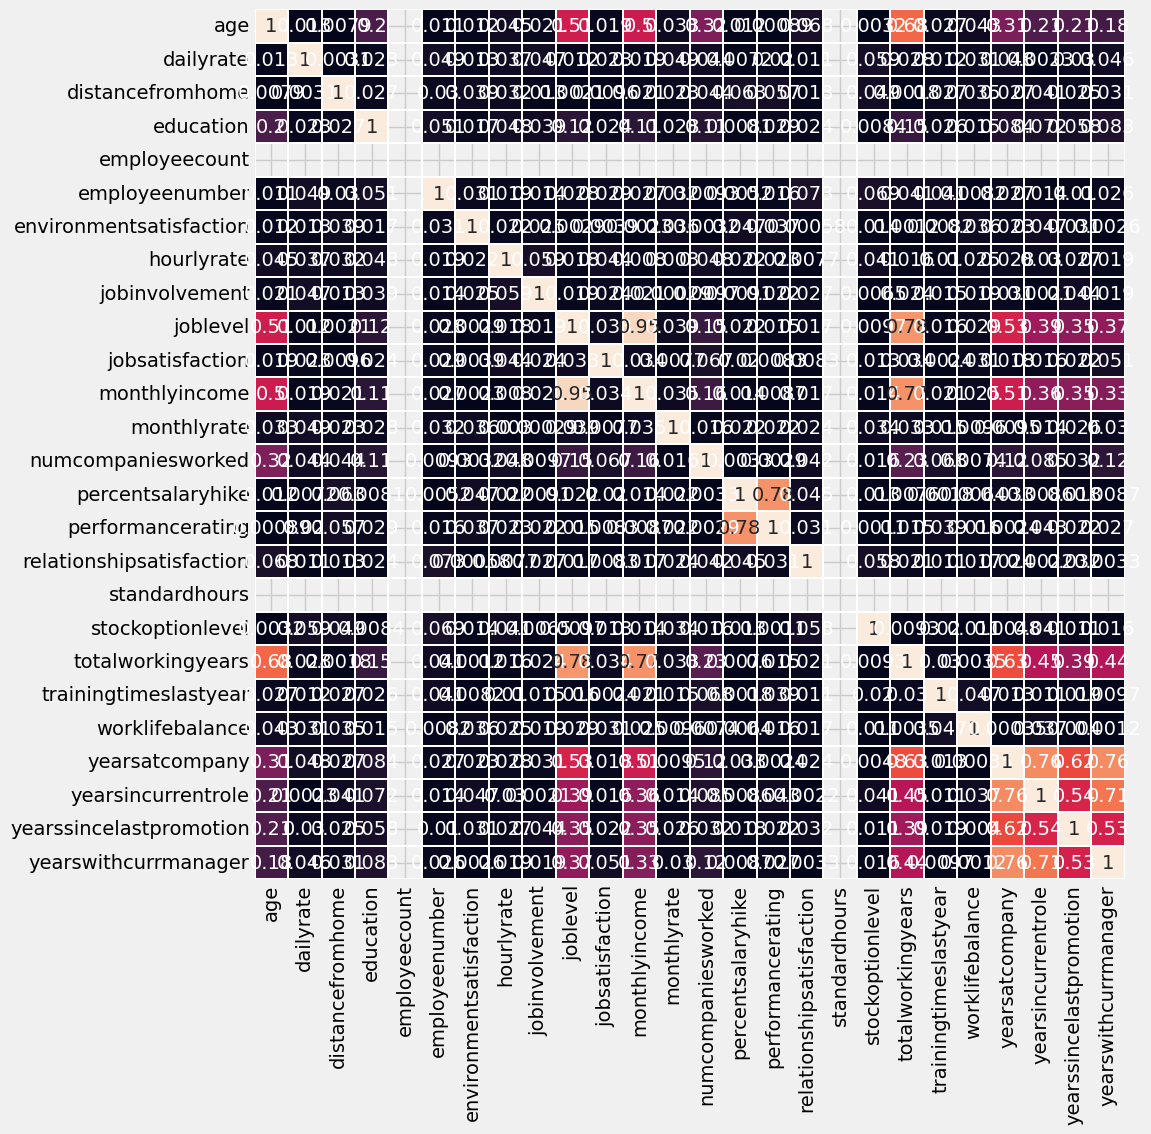

In [ ]:
#Harish
#make figsize readable
fig, ax = plt.subplots(figsize=(10, 30))
sns.heatmap(abs(numeric_df1.corr()), annot=True, square=True, cbar=False, ax=ax, linewidths=0.01);

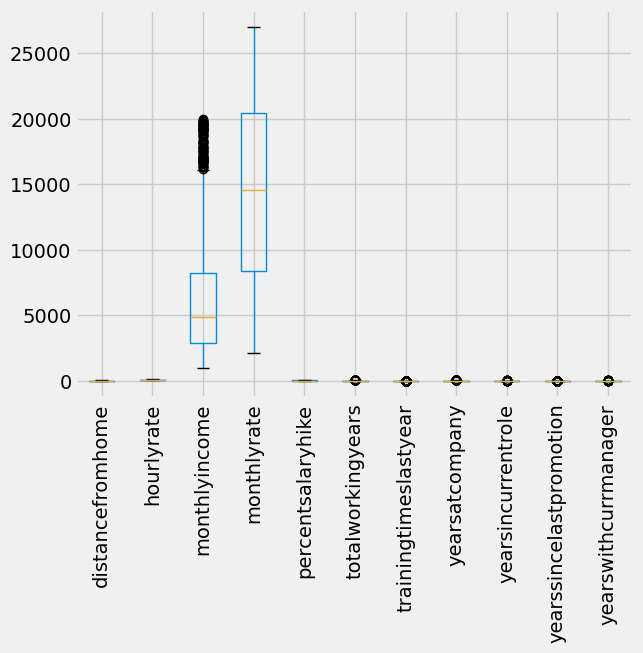

In [ ]:
#Harish
#Look only at real numeric columns for box plot quartiles - ignore numeric encoded box plots
num_cols = ['distancefromhome', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'percentsalaryhike', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']

# create num_df from numeric_df1 containing only columns from num_cols
num_df = numeric_df1[num_cols]

num_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
def plot_outlier_boxplots(df):
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
    num_cols = len(numerical_cols)
    num_plots_per_row = 4
    num_rows = -(-num_cols // num_plots_per_row)  # Ceiling division to determine number of rows

    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))

    for idx, col in enumerate(numerical_cols):
        row_idx = idx // num_plots_per_row
        col_idx = idx % num_plots_per_row

        sns.boxplot(x='attrition', y=col, data=df, ax=axes[row_idx, col_idx], flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='red'))

        # Calculate outliers based on IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        axes[row_idx, col_idx].set_xlabel('attrition', fontsize=10)
        axes[row_idx, col_idx].set_ylabel(col, fontsize=10)
        axes[row_idx, col_idx].set_title(f'{col} vs attrition', fontsize=12)
        axes[row_idx, col_idx].legend()

    plt.tight_layout()
    plt.show()

    return

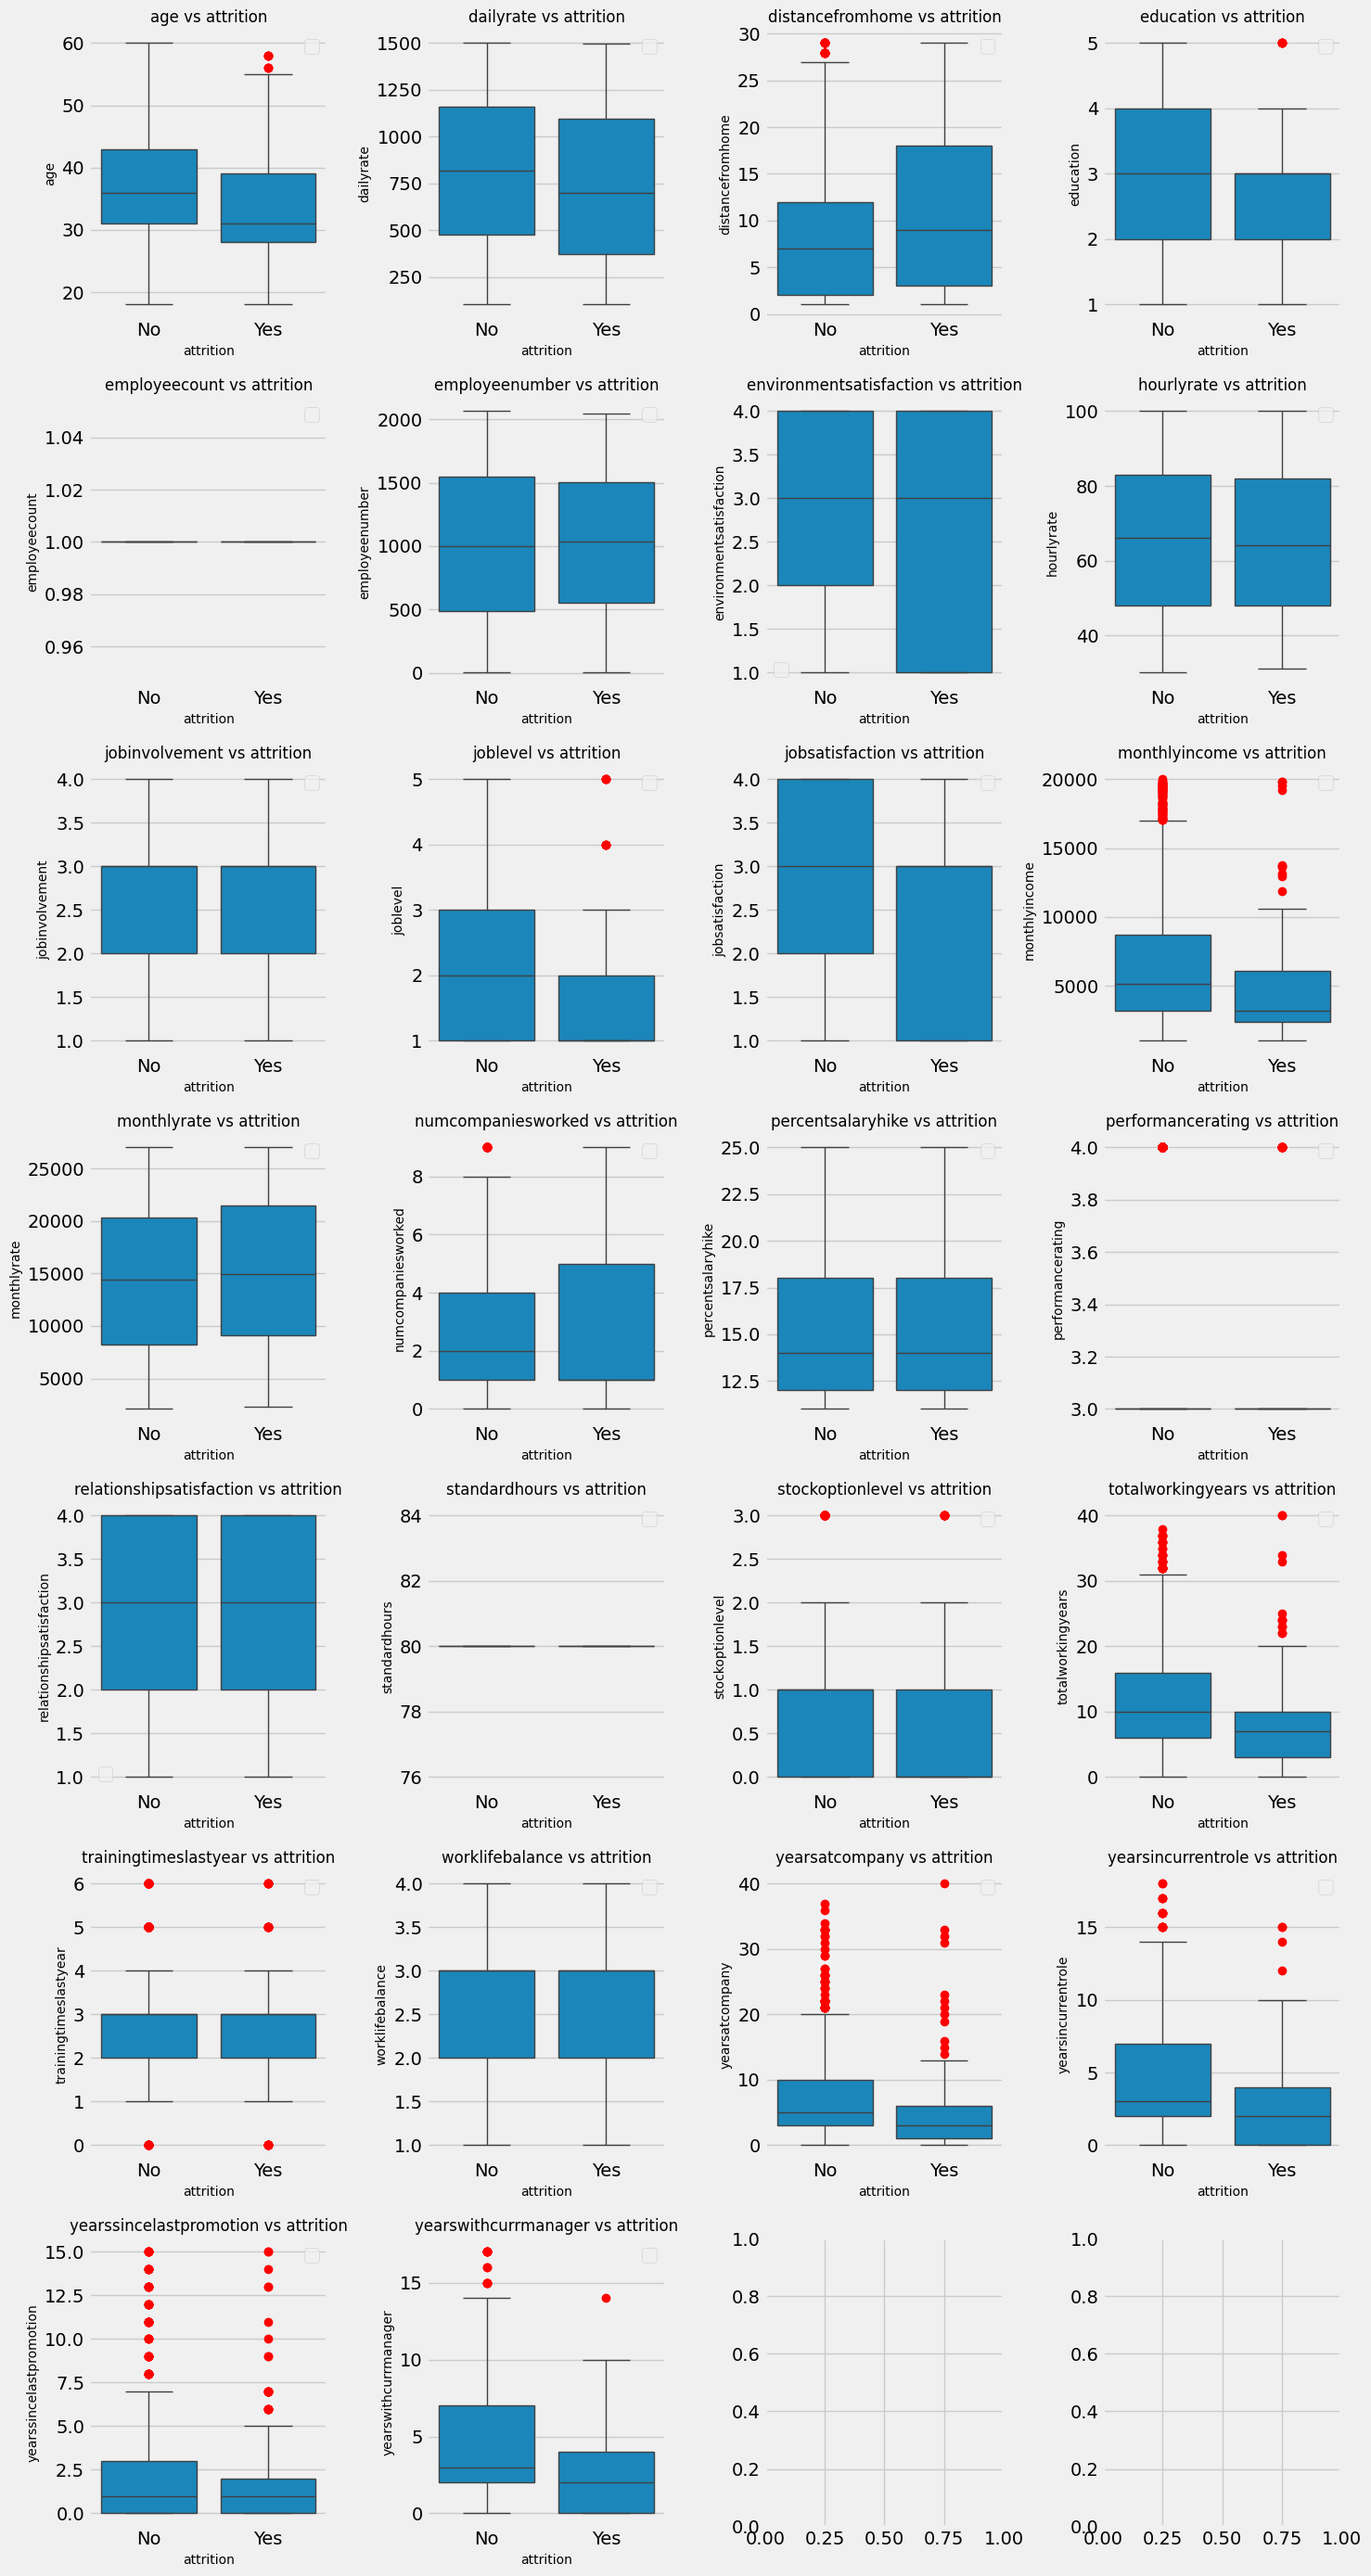

In [ ]:
# Assuming df is your dataframe
plot_outlier_boxplots(df)

In [ ]:
def analyze_distributions(df, target='attrition', n_features=6):
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col != target]

    # Calculate KS test statistic for each feature
    ks_stats = {}
    for col in numeric_cols:
        stay = df[df[target] == 'No'][col]
        leave = df[df[target] == 'Yes'][col]
        statistic, _ = stats.ks_2samp(stay, leave)
        ks_stats[col] = statistic

    # Get top n features with most divergent distributions
    top_features = sorted(ks_stats.items(), key=lambda x: x[1], reverse=True)[:n_features]

    return pd.Series(ks_stats).sort_values(ascending=False)

In [ ]:
ks_scores = analyze_distributions(df)

print("\nTop 10 features with most divergent distributions:")
print(ks_scores.head(10))


Top 10 features with most divergent distributions:
joblevel                0.268822
yearsatcompany          0.262754
stockoptionlevel        0.262414
monthlyincome           0.252900
totalworkingyears       0.251347
age                     0.243338
yearsincurrentrole      0.233241
yearswithcurrmanager    0.219504
distancefromhome        0.140915
jobsatisfaction         0.130236
dtype: float64


In [ ]:
# Another list of divergent features using IQR

iqr_dict = {}

# Calculate IQR for each feature
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Ensure the column is numeric
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_dict[column] = IQR

# Sort features by IQR in descending order to list the most divergent ones
sorted_iqr = sorted(iqr_dict.items(), key=lambda item: item[1], reverse=True)

# Print the most divergent features
print("Most divergent features based on IQR:")
for feature, iqr_value in sorted_iqr:
    print(f"{feature}: {iqr_value}")


Most divergent features based on IQR:
monthlyrate: 12068.75
monthlyincome: 5300.5
employeenumber: 1052.25
dailyrate: 685.75
hourlyrate: 35.0
age: 13.0
distancefromhome: 12.0
totalworkingyears: 9.0
percentsalaryhike: 6.0
yearsatcompany: 6.0
yearsincurrentrole: 5.0
yearswithcurrmanager: 5.0
numcompaniesworked: 3.0
yearssincelastpromotion: 2.75
education: 2.0
environmentsatisfaction: 2.0
joblevel: 2.0
jobsatisfaction: 2.0
relationshipsatisfaction: 2.0
jobinvolvement: 1.0
stockoptionlevel: 1.0
trainingtimeslastyear: 1.0
worklifebalance: 1.0
employeecount: 0.0
performancerating: 0.0
standardhours: 0.0


### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
# Clip outliers
for col in numerical_cols:
    lower_bound = df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75)
    df[col] = df[col].clip(lower_bound, upper_bound)


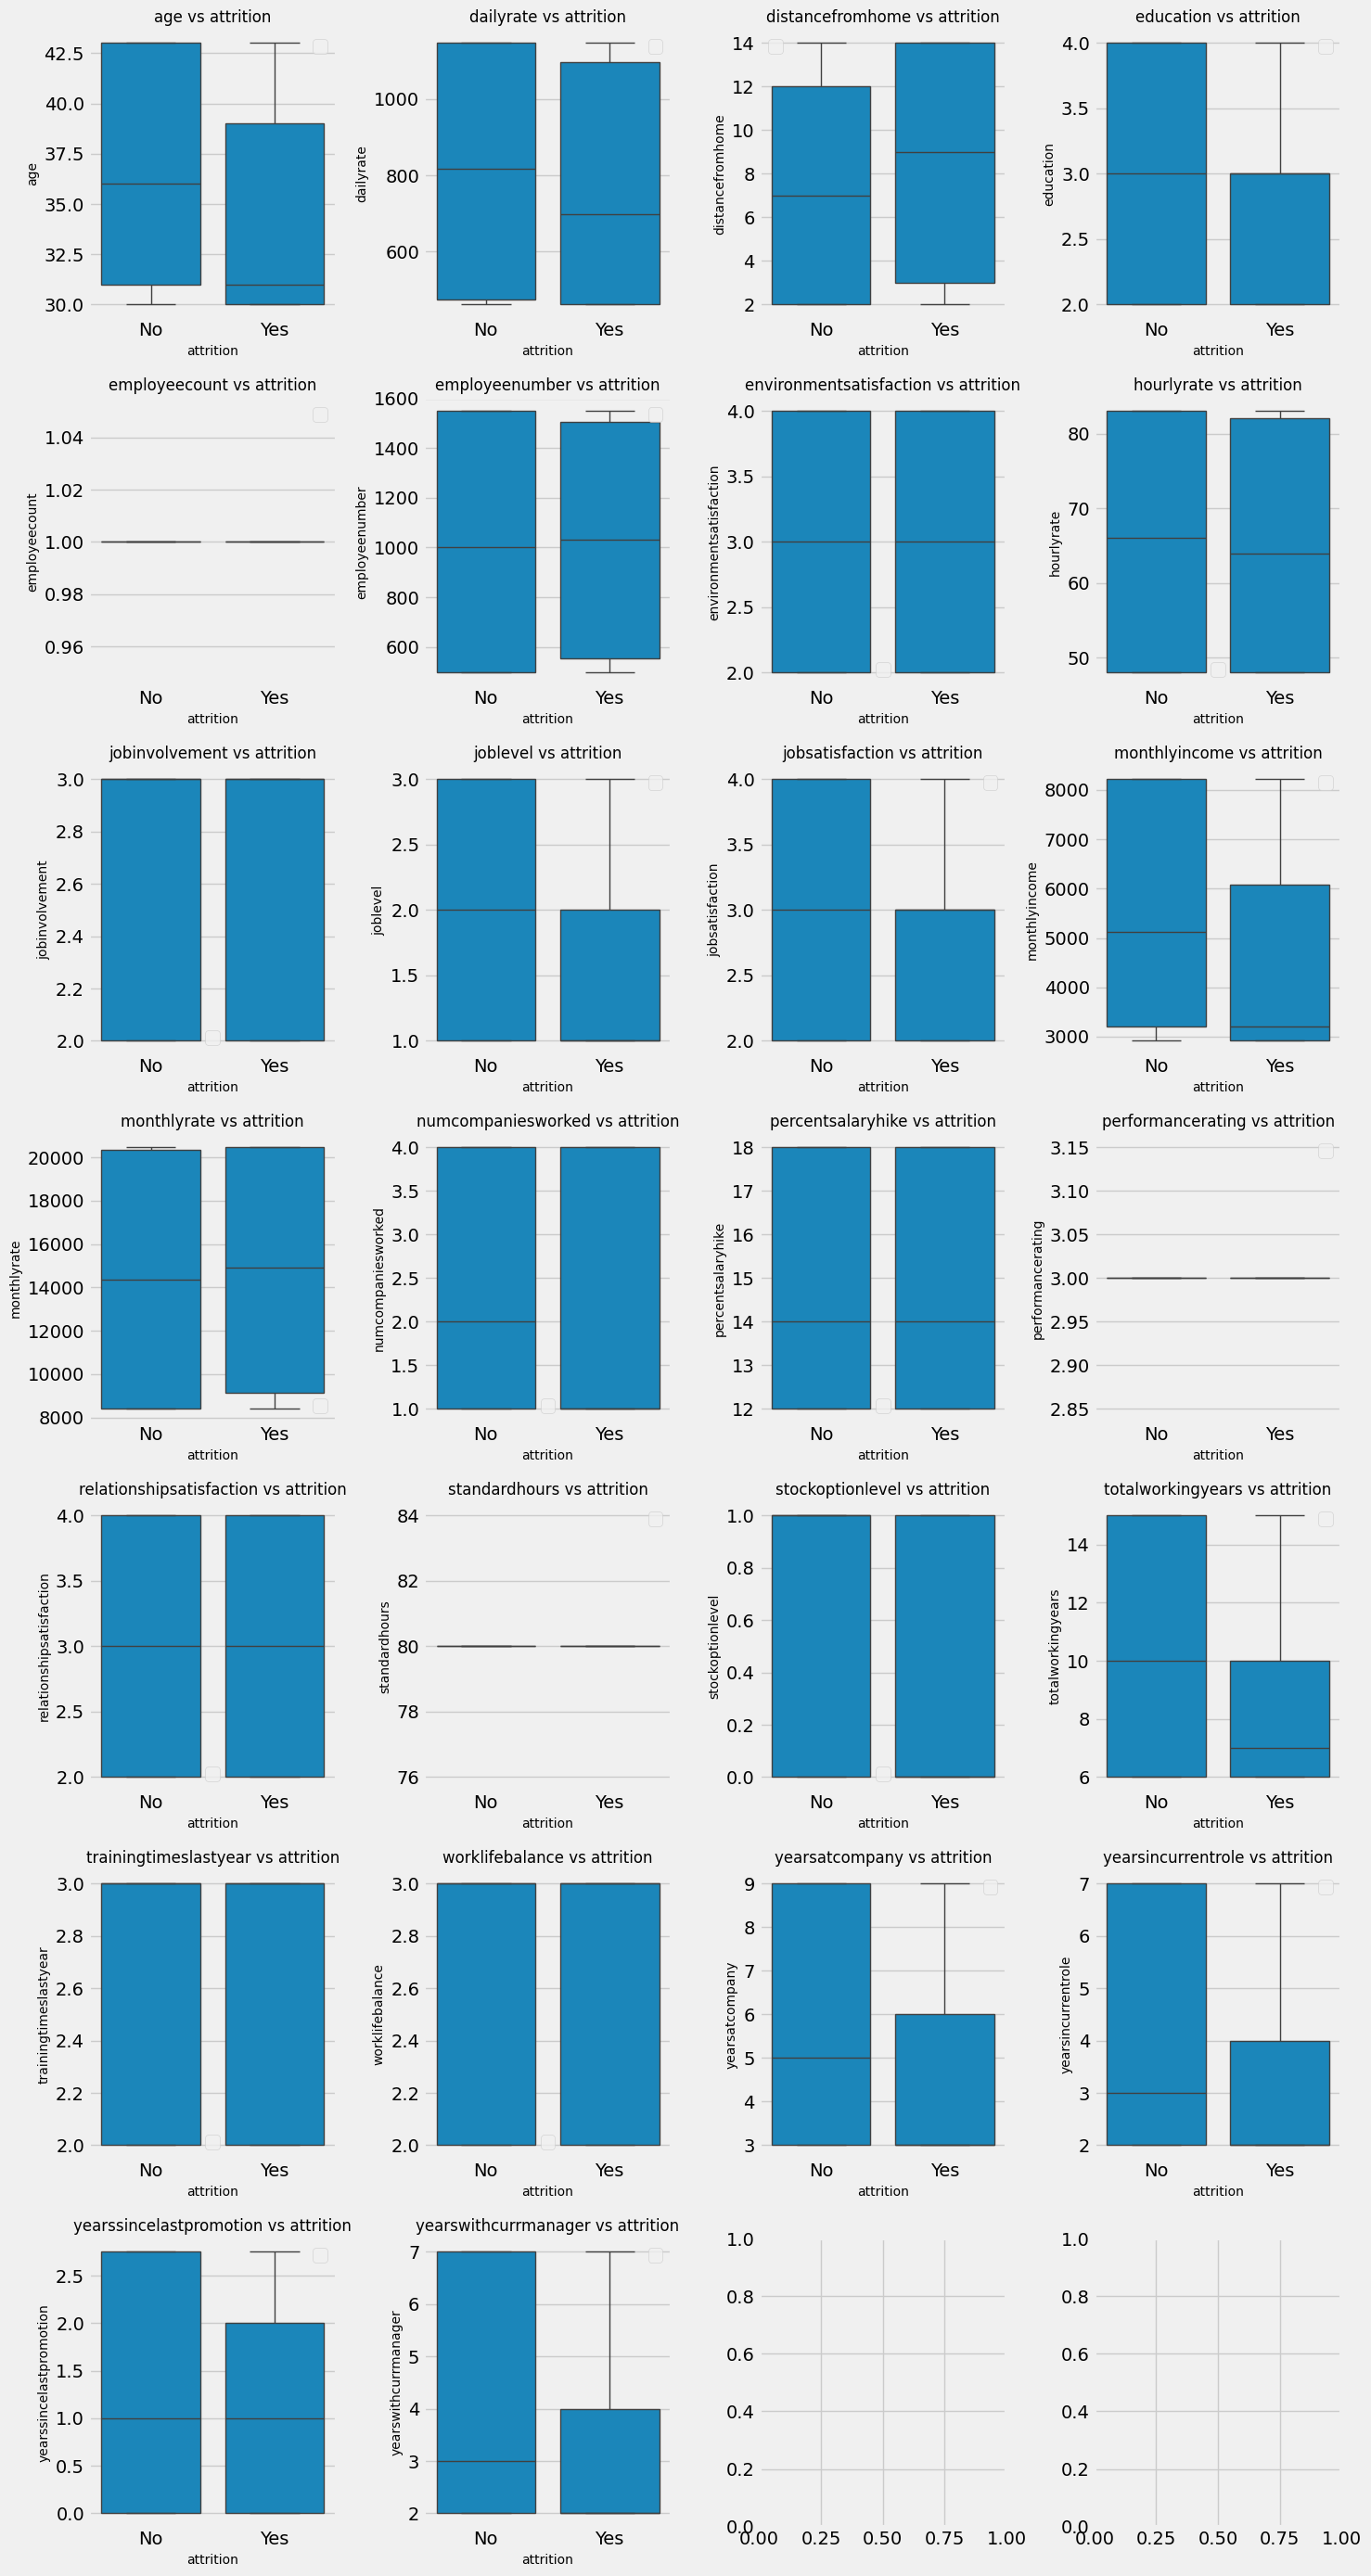

In [ ]:
# Recheck for outliers
plot_outlier_boxplots(df)

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count the unique values in the 'attrition' column
attrition_counts = df['attrition'].value_counts()

print(attrition_counts)

attrition
No     981
Yes    189
Name: count, dtype: int64


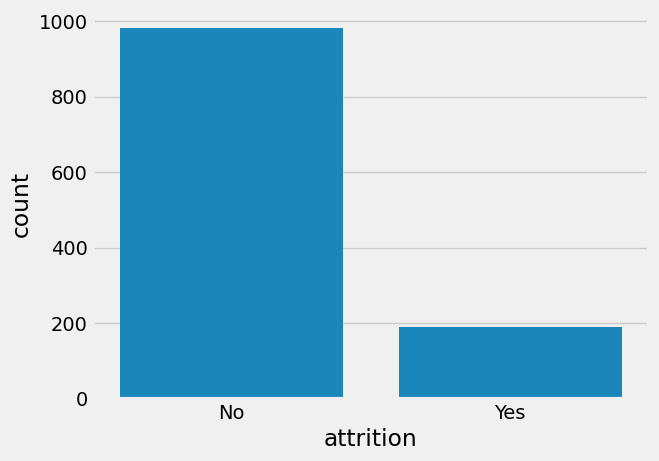

In [ ]:
# Plot barplot to visualize balance/imbalance

sns.countplot(x='attrition', data=df)
plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

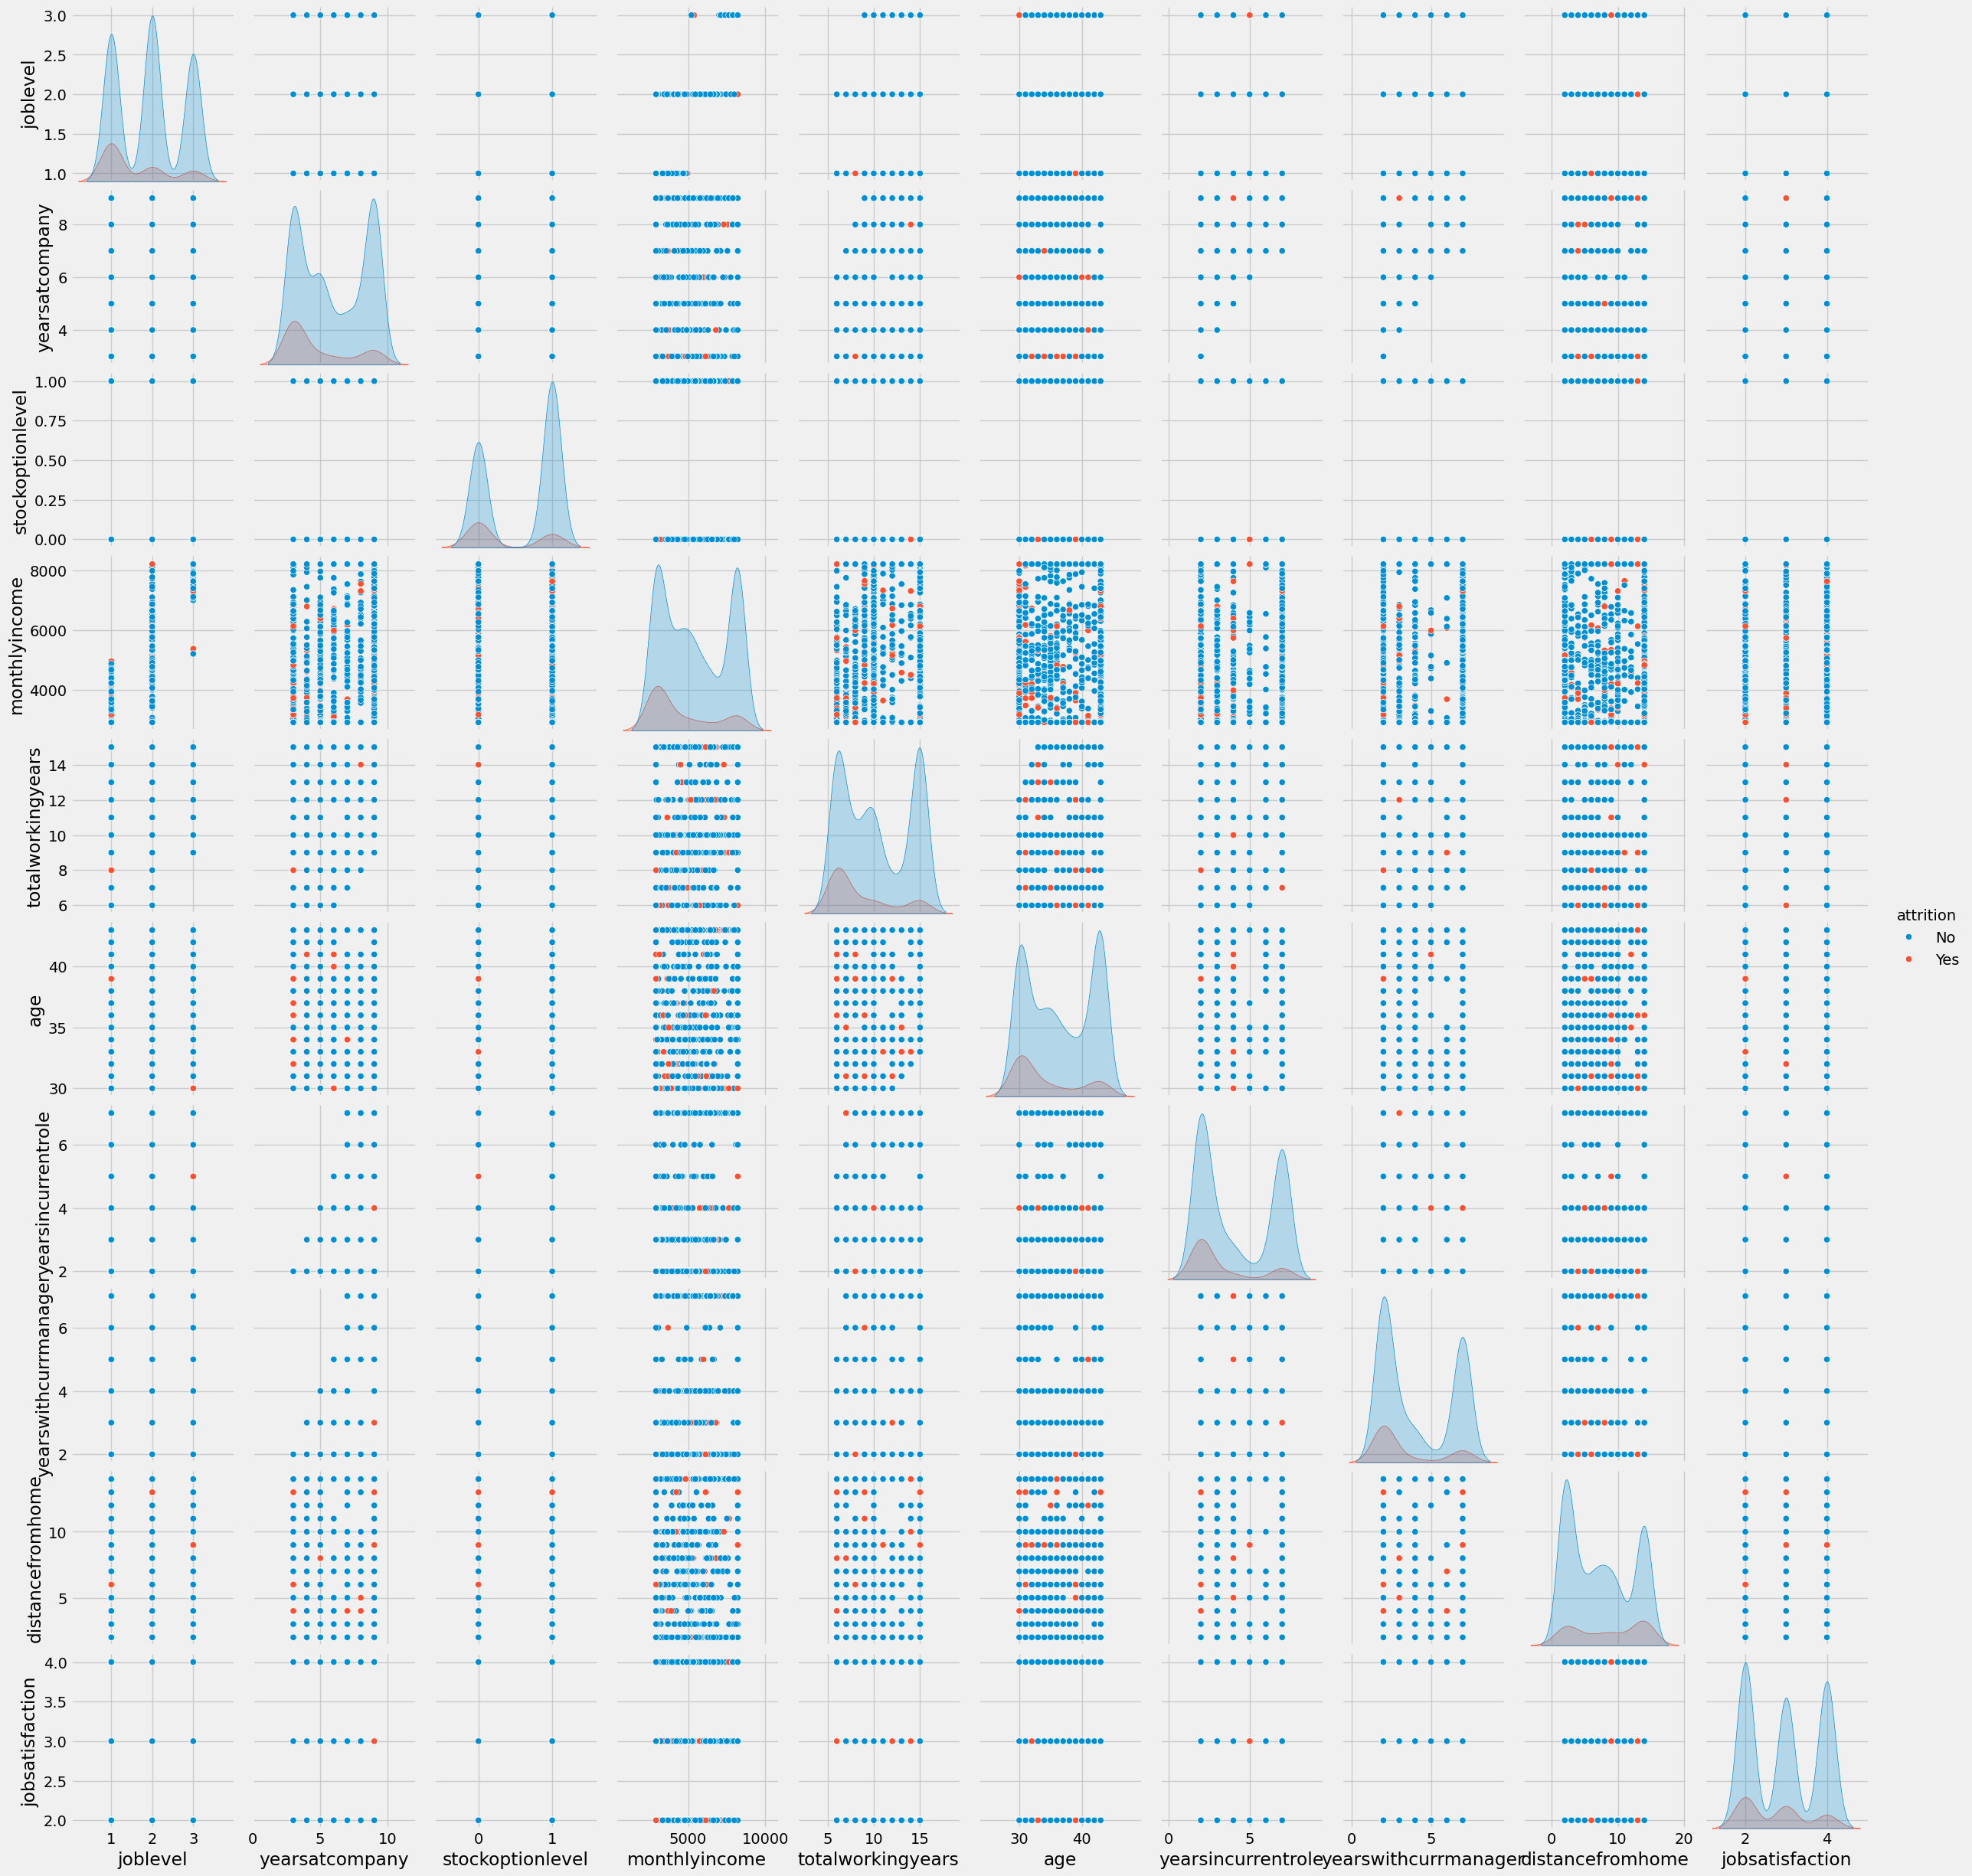

In [ ]:
# Visualize a pairplot with the top 10 features

top_10_features = ks_scores.head(10).index.tolist()

sns.pairplot(df[top_10_features + ['attrition']], hue='attrition')
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

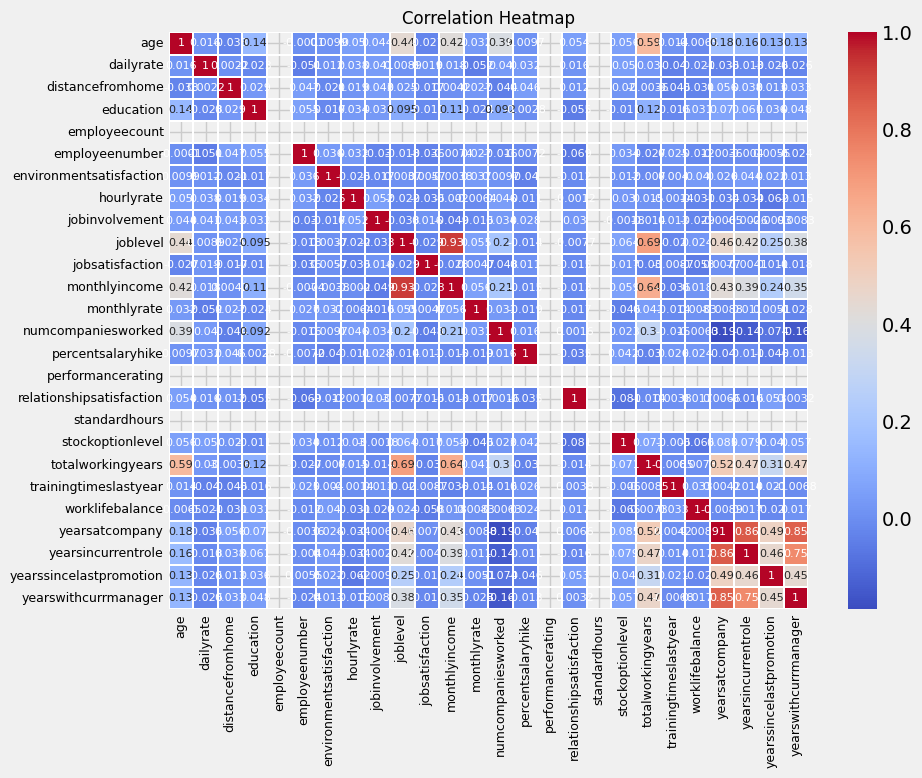

In [ ]:
# Visualize the correlation among numerical features using heatmap

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.25, annot_kws={"size": 8})

plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

Refer to the Additional Notebook: CatBoost parameter tuning [CDS-B8 GDrive -> Module 3 -> Assignments -> July 27, 2024 -> Additional Notebook (ungraded) -> Addl_NB_Tuning_hyerparameters_using_Hyperopt]

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
# Copy the data
# YOUR CODE HERE

In [ ]:
# Target Column
# YOUR CODE HERE

In [ ]:
# Feature Space
# YOUR CODE HERE

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create CatBoost model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe
# YOUR CODE HERE

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
# YOUR CODE HERE

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column
# YOUR CODE HERE

In [ ]:
# Feature Space
# YOUR CODE HERE

# Targer label
# YOUR CODE HERE

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create XGBoost classifier model
# YOUR CODE HERE

In [ ]:
y_test[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
# Create XGBClassifier object
XGB_clf = XGBClassifier(learning_rate = 0.1)

In [ ]:
# Fit on training set
XGB_clf.fit(X_train, y_train,
            eval_set = [(X_train, y_train), (X_test, y_test)],
            verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Performance

In [ ]:
# Prediction using XGBClassifier
XGB_prediction = XGB_clf.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, XGB_prediction))

Accuracy Score:  0.8376068376068376


In [ ]:
# Classification report for XGBoost

print('Classification Report for XGBoost:')
print(classification_report(y_test, XGB_prediction))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       196
           1       0.50      0.18      0.27        38

    accuracy                           0.84       234
   macro avg       0.68      0.57      0.59       234
weighted avg       0.80      0.84      0.80       234



In [ ]:
#Apply xgboost with imbalance
from numpy import mean

# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.80888


In [ ]:
#check regularization parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import mean

# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

#Fit the data
grid_result = grid.fit(X_train, y_train)

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.808883 (0.049506) with: {'scale_pos_weight': 1}
0.798220 (0.054969) with: {'scale_pos_weight': 10}
0.792005 (0.056125) with: {'scale_pos_weight': 25}
0.786119 (0.058448) with: {'scale_pos_weight': 50}
0.779744 (0.063739) with: {'scale_pos_weight': 75}
0.773867 (0.062070) with: {'scale_pos_weight': 99}
0.774457 (0.060170) with: {'scale_pos_weight': 100}
0.772755 (0.058696) with: {'scale_pos_weight': 1000}
Best: 0.808883 using {'scale_pos_weight': 1}


In [ ]:
#fit model
model = XGBClassifier(scale_pos_weight=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
XGB_Imbalanced_prediction = model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, XGB_Imbalanced_prediction))

Accuracy Score:  0.8418803418803419


## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

## Kaggle Prediction

Load data from Kaggle competition site

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# From the given Kaggle competition link, load the dataset 'hr_employee_attrition_test.csv'
df_kag = pd.read_csv('/content/drive/MyDrive/hr_employee_attrition_test.csv')

In [ ]:
df_kag.head(5)

,id,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,28,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,4,Male,74,3,1,Sales Representative,2,Married,1052,23384,1,Y,No,22,4,2,80,0,1,5,3,1,0,0,0
1,2,32,Travel_Frequently,585,Research & Development,10,3,Life Sciences,1,1720,1,Male,56,3,1,Research Scientist,3,Married,3433,17360,6,Y,No,13,3,1,80,1,10,3,2,5,2,1,3
2,3,41,Travel_Rarely,1085,Research & Development,2,4,Life Sciences,1,927,2,Female,57,1,1,Laboratory Technician,4,Divorced,2778,17725,4,Y,Yes,13,3,3,80,1,10,1,2,7,7,1,0
3,4,42,Travel_Rarely,557,Research & Development,18,4,Life Sciences,1,1998,4,Male,35,3,2,Research Scientist,1,Divorced,5410,11189,6,Y,Yes,17,3,3,80,1,9,3,2,4,3,1,2
4,5,41,Travel_Frequently,1018,Sales,1,3,Marketing,1,1349,3,Female,66,3,2,Sales Executive,1,Divorced,4103,4297,0,Y,No,17,3,4,80,1,10,2,3,9,3,1,7


In [ ]:
# From the dataset 'hr_employee_attrition_test.csv', drop columns ['id','employeenumber', 'employeecount', 'over18'] having single value
# YOUR CODE HERE
df_kag.drop(['id','employeenumber', 'employeecount', 'over18'], axis=1,inplace=True)

In [ ]:
df_kag.head(5)

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,28,Travel_Rarely,1144,Sales,10,1,Medical,4,Male,74,3,1,Sales Representative,2,Married,1052,23384,1,No,22,4,2,80,0,1,5,3,1,0,0,0
1,32,Travel_Frequently,585,Research & Development,10,3,Life Sciences,1,Male,56,3,1,Research Scientist,3,Married,3433,17360,6,No,13,3,1,80,1,10,3,2,5,2,1,3
2,41,Travel_Rarely,1085,Research & Development,2,4,Life Sciences,2,Female,57,1,1,Laboratory Technician,4,Divorced,2778,17725,4,Yes,13,3,3,80,1,10,1,2,7,7,1,0
3,42,Travel_Rarely,557,Research & Development,18,4,Life Sciences,4,Male,35,3,2,Research Scientist,1,Divorced,5410,11189,6,Yes,17,3,3,80,1,9,3,2,4,3,1,2
4,41,Travel_Frequently,1018,Sales,1,3,Marketing,3,Female,66,3,2,Sales Executive,1,Divorced,4103,4297,0,No,17,3,4,80,1,10,2,3,9,3,1,7


In [ ]:
# Organize columns for encoding
#ordinal-categorical
print ('oc:', ordinal_categorical)
#ordinal_categorical =  ['education', 'environmentsatisfaction', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'numcompaniesworked', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'worklifebalance']

#create new df_oc from df for ordinal categorical values
#df_oc = df[ordinal_categorical]

#categorical columns --> Use label encoding as there is no order in data
print ('categorical:',categorical)
#categorical =  ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'overtime']
#df_cat = df[categorical]

#numeric columns
print ('numeric',numeric_col)
#numeric_col = ['age', 'distancefromhome', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'percentsalaryhike', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
#df_numcols = df[numeric_col]


#store drop columns
#drop_cols = ['employeecount', 'employeenumber', 'over18', 'standardhours']

oc: ['education', 'environmentsatisfaction', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'numcompaniesworked', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'worklifebalance']
categorical: ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'overtime']
numeric ['age', 'distancefromhome', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'percentsalaryhike', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


In [ ]:
df_kag_cat = df_kag[categorical]
df_kag_oc = df_kag[ordinal_categorical]
df_kag_numcols = df_kag[numeric_col]

In [ ]:
#Harish
#construct X_kag
X_kag = pd.concat([df_kag_cat, df_kag_oc, df_kag_numcols], axis=1)
X_kag.head(5)

,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime,education,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,numcompaniesworked,performancerating,relationshipsatisfaction,stockoptionlevel,worklifebalance,age,distancefromhome,hourlyrate,monthlyincome,monthlyrate,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,Travel_Rarely,Sales,Medical,Male,Sales Representative,Married,No,1,4,3,1,2,1,4,2,0,3,28,10,74,1052,23384,22,1,5,1,0,0,0
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,3,1,3,1,3,6,3,1,1,2,32,10,56,3433,17360,13,10,3,5,2,1,3
2,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Divorced,Yes,4,2,1,1,4,4,3,3,1,2,41,2,57,2778,17725,13,10,1,7,7,1,0
3,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Yes,4,4,3,2,1,6,3,3,1,2,42,18,35,5410,11189,17,9,3,4,3,1,2
4,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Divorced,No,3,3,3,2,1,0,3,4,1,3,41,1,66,4103,4297,17,10,2,9,3,1,7


In [ ]:
# Handle categorical features
# YOUR CODE HERE
#le categorical columns
le_bt_kag = LabelEncoder()
le_dept_kag = LabelEncoder()
le_ed_kag = LabelEncoder()
le_gender_kag = LabelEncoder()
le_jobrole_kag = LabelEncoder()
le_maritalstatus_kag = LabelEncoder()
le_overtime_kag = LabelEncoder()

X_kag['businesstravel'] = le_bt_kag.fit_transform(X_kag['businesstravel'])
X_kag['department'] = le_dept_kag.fit_transform(X_kag['department'])
X_kag['educationfield'] = le_ed_kag.fit_transform(X_kag['educationfield'])
X_kag['gender'] = le_gender_kag.fit_transform(X_kag['gender'])
X_kag['jobrole'] = le_jobrole_kag.fit_transform(X_kag['jobrole'])
X_kag['maritalstatus'] = le_maritalstatus_kag.fit_transform(X_kag['maritalstatus'])
X_kag['overtime'] = le_overtime_kag.fit_transform(X_kag['overtime'])

In [ ]:
X_kag.head(5)

,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime,education,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,numcompaniesworked,performancerating,relationshipsatisfaction,stockoptionlevel,worklifebalance,age,distancefromhome,hourlyrate,monthlyincome,monthlyrate,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,2,2,3,1,8,1,0,1,4,3,1,2,1,4,2,0,3,28,10,74,1052,23384,22,1,5,1,0,0,0
1,1,1,1,1,6,1,0,3,1,3,1,3,6,3,1,1,2,32,10,56,3433,17360,13,10,3,5,2,1,3
2,2,1,1,0,2,0,1,4,2,1,1,4,4,3,3,1,2,41,2,57,2778,17725,13,10,1,7,7,1,0
3,2,1,1,1,6,0,1,4,4,3,2,1,6,3,3,1,2,42,18,35,5410,11189,17,9,3,4,3,1,2
4,1,2,2,0,7,0,0,3,3,3,2,1,0,3,4,1,3,41,1,66,4103,4297,17,10,2,9,3,1,7


In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

Predictions

In [ ]:
# Get the predictions using your already trained CatBoost classifier model achieved in Exercise 9
# YOUR CODE HERE

In [ ]:
# Get the predictions using your already trained XGBoost classifier model achieved in Exercise 11
# YOUR CODE HERE
result = model.predict(X_kag)

In [ ]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#create df_result, with id and label
#for each entry in result, create id from 1 and map result
df_result = pd.DataFrame({'id': range(1, len(result) + 1), 'label': result})

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
295,296,0
296,297,0
297,298,0
298,299,0


In [ ]:
df_result['label'].value_counts()

,count
label,
0,275
1,25


In [ ]:
#export df_result as csv
df_result.to_csv('result_M2_MP4_team5_ea.csv', index=False)

In [ ]:
result_kag = le_y.inverse_transform(result)

In [ ]:
result_kag

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 

Get the predictions using your trained Microsoft LightGBM model (Optional)

In [ ]:
# Get the predictions using your already trained Microsoft LightGBM classifier model
# achieved under the optional exercise 'Apply LightGBM (Optional)'
# YOUR CODE HERE

Save predictions to csv and submit under given Kaggle competiton link

In [ ]:
# YOUR CODE HERE
#read sample submission from '/content/drive/MyDrive/Colab Notebooks/Sample_Submission_ea.csv'
df_ss_ea = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sample_Submission_ea.csv')

In [ ]:
df_ss_ea.head()

,id,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
